In [5]:
#pip install opencv-python #please install opencv

<b style="color:blue;">1. Load the datasets and get the list of all animal classes</b>

In [6]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

folder_path = '..\..\datasets\\animals'
directories = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]
animal_classes = directories #get the list all animal classes
print(animal_classes)

['BearHead', 'CatHead', 'ChickenHead', 'CowHead', 'DeerHead', 'DogHead', 'DuckHead', 'EagleHead', 'ElephantHead', 'HumanHead', 'LionHead', 'MonkeyHead', 'MouseHead', 'Natural', 'PandaHead', 'PigeonHead', 'PigHead', 'RabbitHead', 'SheepHead', 'TigerHead', 'WolfHead']


<b style="color:blue;">2. Display an animal of each class </b>

class: BearHead --> bearfrontal0001.jpg


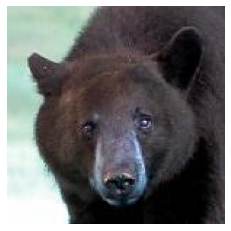

class: CatHead --> cat000852.jpg


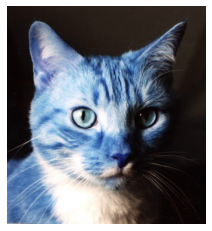

class: ChickenHead --> chickenside0001.jpg


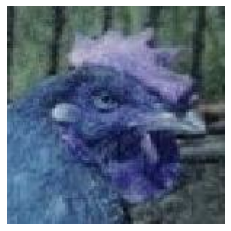

class: CowHead --> 01_05_21---Cow_web.jpg


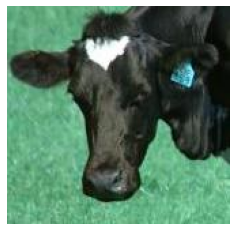

class: DeerHead --> 0000000001.jpg


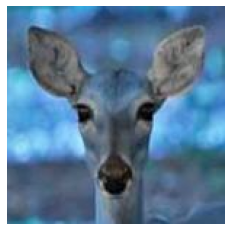

class: DogHead --> dog000001c.jpg


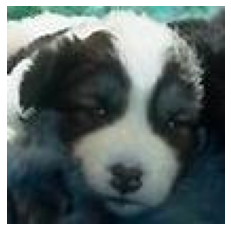

class: DuckHead --> 01_08_18---Duck_web.jpg


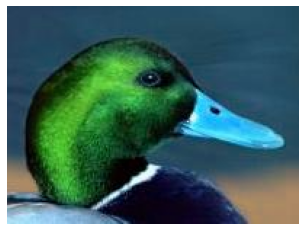

class: EagleHead --> 040305-098..jpg


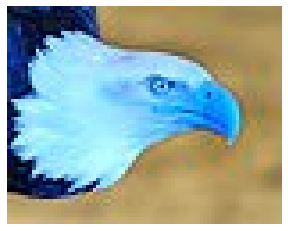

class: ElephantHead --> 0000000001.jpg


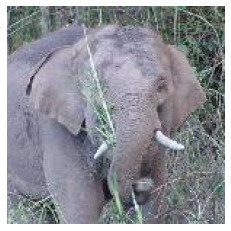

class: HumanHead --> 0000000001.jpg


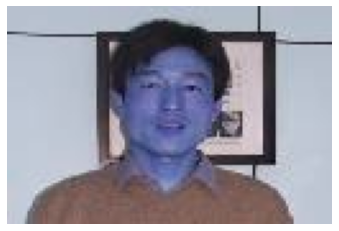

class: LionHead --> lion,7y.jpg


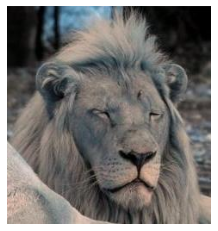

class: MonkeyHead --> monkeyfrontal0001.jpg


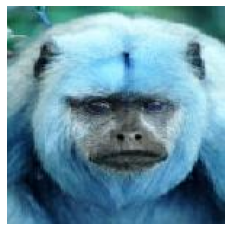

class: MouseHead --> mousefrontal0001.jpg


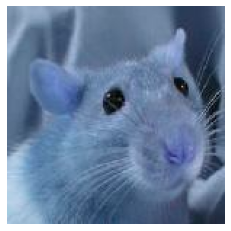

class: Natural --> 001004.jpg


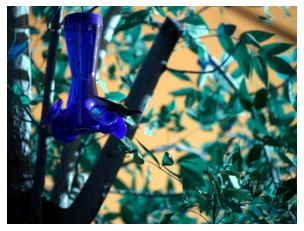

class: PandaHead --> 20080310_panda.jpg


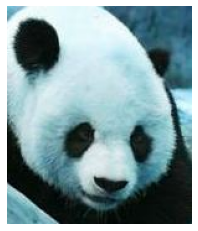

class: PigeonHead --> 01_37_52---Pigeon_web.jpg


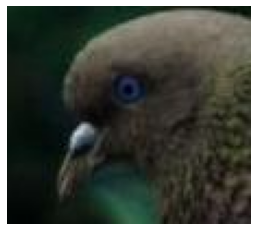

class: PigHead --> 187980686_f95619cc5b.jpg


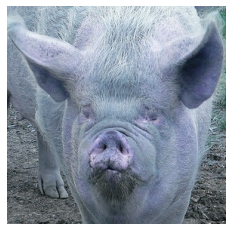

class: RabbitHead --> rabbitfrontalfrontal0001.jpg


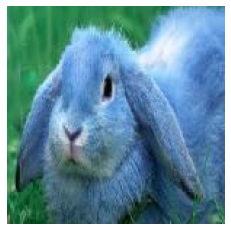

class: SheepHead --> sheepfrontal0001.jpg


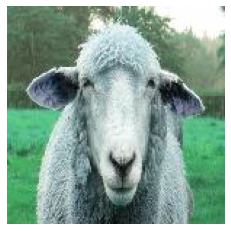

class: TigerHead --> 1235_white-baby-tiger.jpg


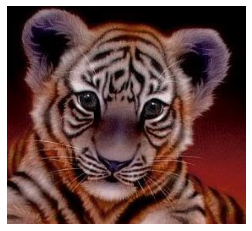

class: WolfHead --> wolffrontal0001.jpg


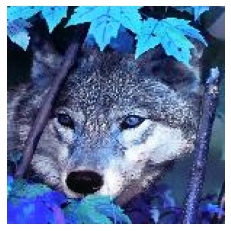

In [7]:
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import cv2
import numpy as np

Nc = len(animal_classes)
for class_name in animal_classes:
    folder_path_detail = '..\..\datasets\\animals\\'+str(class_name)
    for file_name in os.listdir(folder_path_detail):
        print('class:',class_name,'-->',file_name)
        file_path = folder_path_detail+"\\"+file_name
        image = cv2.imread(folder_path_detail+"\\"+file_name)  
        
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        break

<b style="color:blue;">3. Create a dataframe of records based on the image data and the existing class labels</b>

<ol>
    <li>Convert every image to grayscale (black and white)</li>
    <li>Resize every image to the same size (40 x 40)</li>
    <li>Convert the image matrix into an array of pixel features</li>
    <li>Form your dataframe</li>
</ol>

In [8]:
import cv2
new_width = 40
new_height = 40

image_df = pd.DataFrame(columns=['image_name', 'image_class'] + [f'feat_{i}' for i in range(new_width*new_height)])

for class_name in animal_classes:
    folder_path_detail = '..\..\datasets\\animals\\'+str(class_name)
    for file_name in os.listdir(folder_path_detail):
        file_path = folder_path_detail+"\\"+file_name
        image = cv2.imread(folder_path_detail+"\\"+file_name)  
        #print(file_name)
        #print(image.shape)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resize_image = cv2.resize(gray_image,(new_width,new_height))
        pixels = resize_image.flatten()
        
        #image_df.loc[len(image_df)+1,['image_name','image_class']] = [file_name,class_name]
        image_df = image_df.append({
                'image_name': file_name,
                'image_class': class_name,
                **{f'feat_{i}': pixel for i, pixel in enumerate(pixels)}
            }, ignore_index=True)
        
        #for i in range(new_width*new_height):
        #    image_df.loc[len(image_df),'feat_%d'%(i)] = pixels[i]
        
image_df.head()

,image_name,image_class,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,...,feat_1590,feat_1591,feat_1592,feat_1593,feat_1594,feat_1595,feat_1596,feat_1597,feat_1598,feat_1599
0,bearfrontal0001.jpg,BearHead,-50,-50,-50,-50,-49,-50,-55,-58,...,2,2,2,0,0,4,40,44,46,72
1,bearfrontal0002.jpg,BearHead,5,1,19,7,19,15,15,15,...,81,88,81,78,67,72,88,85,89,117
2,bearfrontal0003.jpg,BearHead,106,110,109,119,112,103,103,108,...,122,119,-127,-124,-122,-101,-108,-98,-92,-79
3,bearfrontal0004.jpg,BearHead,121,114,108,99,98,101,94,100,...,24,26,44,91,81,82,66,-125,109,103
4,bearfrontal0005.jpg,BearHead,-78,-79,-81,-83,-81,-83,-82,-84,...,120,75,64,53,90,59,36,63,73,40


<b style="color:blue;">4. Split the Data into Training/Test set</b>

In [ ]:
from sklearn.model_selection import train_test_split

X = image_df.iloc[:,2:1603]
y = image_df[['image_class']]